In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Connect to PostgreSQL
db_uri = {db_uri}
engine = create_engine(db_uri)

# Fetch engagement data with timestamps
query = """
SELECT pd.post_id, p.influencer_id, i.username, 
       TO_TIMESTAMP(pd.timestamp) AS timestamp,  -- Convert Unix timestamp
       (pd.likes + pd.comments) AS total_engagement
FROM post_details pd
JOIN posts p ON pd.post_id = p.post_id
JOIN influencers i ON p.influencer_id = i.influencer_id
WHERE pd.timestamp IS NOT NULL
ORDER BY timestamp;
"""
df = pd.read_sql(query, engine)
engine.dispose()

# Convert Unix timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Check if timestamps are correct now
print(df["timestamp"].describe())  # Should show actual years like 2012-2019

count                                2587818
mean     2018-06-24 18:03:30.498865920+00:00
min                2012-01-25 20:37:48+00:00
25%                2018-03-09 19:17:00+00:00
50%                2018-08-13 21:33:14+00:00
75%                2018-12-09 12:12:31+00:00
max                2019-05-08 00:01:07+00:00
Name: timestamp, dtype: object


In [4]:
print(df.columns)

Index(['post_id', 'influencer_id', 'username', 'timestamp',
       'total_engagement'],
      dtype='object')


                  timestamp  total_engagement
0 2012-01-25 00:00:00+00:00                 0
1 2012-01-26 00:00:00+00:00                 0
2 2012-01-27 00:00:00+00:00                 0
3 2012-01-28 00:00:00+00:00                 0
4 2012-01-29 00:00:00+00:00                 0


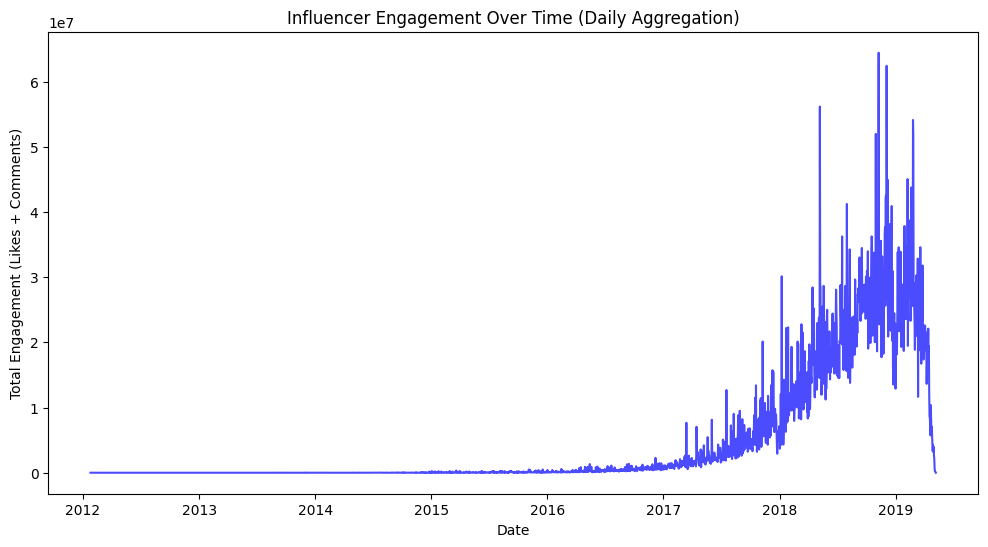

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure timestamp is in datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Set timestamp as index before resampling
df.set_index("timestamp", inplace=True)

# Aggregate engagement per day
daily_engagement = df["total_engagement"].resample("D").sum().reset_index()

# Fill NaN values (Fixed)
daily_engagement = daily_engagement.assign(total_engagement=daily_engagement["total_engagement"].fillna(0))

# Check if values are reasonable
print(daily_engagement.head())

# Plot engagement trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_engagement, x="timestamp", y="total_engagement", color="blue", alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Total Engagement (Likes + Comments)")
plt.title("Influencer Engagement Over Time (Daily Aggregation)")
plt.show()

In [6]:
# Compute basic stats
engagement_summary = daily_engagement["total_engagement"].describe()

print("🔹 **Overall Engagement Summary**")
print(engagement_summary)
# Get top 10 highest engagement days
top_viral_days = daily_engagement.sort_values(by="total_engagement", ascending=False).head(10)

print("🔹 **Top 10 Viral Days**")
print(top_viral_days)
# Compute total engagement per influencer
influencer_engagement = df.groupby("username")["total_engagement"].sum()

# Get top 10 most viral influencers
top_viral_influencers = influencer_engagement.sort_values(ascending=False).head(10)

print("🔹 **Top 10 Viral Influencers**")
print(top_viral_influencers)
# Compute rolling standard deviation over a 7-day window
daily_engagement["volatility"] = daily_engagement["total_engagement"].rolling(window=7).std()

# Get highest volatility periods (most unstable engagement)
high_volatility = daily_engagement.sort_values(by="volatility", ascending=False).head(10)

print("🔹 **Top 10 Most Volatile Engagement Periods**")
print(high_volatility)


🔹 **Overall Engagement Summary**
count    2.661000e+03
mean     4.487858e+06
std      9.036504e+06
min      0.000000e+00
25%      4.000000e+00
50%      7.088600e+04
75%      2.897180e+06
max      6.443266e+07
Name: total_engagement, dtype: float64
🔹 **Top 10 Viral Days**
                     timestamp  total_engagement
2480 2018-11-09 00:00:00+00:00          64432658
2505 2018-12-04 00:00:00+00:00          62420998
2295 2018-05-08 00:00:00+00:00          56165100
2588 2019-02-25 00:00:00+00:00          54115578
2471 2018-10-31 00:00:00+00:00          51978628
2589 2019-02-26 00:00:00+00:00          51583526
2479 2018-11-08 00:00:00+00:00          48555874
2571 2019-02-08 00:00:00+00:00          45047800
2508 2018-12-07 00:00:00+00:00          44953848
2583 2019-02-20 00:00:00+00:00          43763588
🔹 **Top 10 Viral Influencers**
username
kendalljenner      495659758
priyankachopra     290383138
caradelevingne     174214262
jlo                126536082
jacquelinef143     123996976
bell

In [7]:
df.to_sql('influencer_analysis', engine, if_exists='append', index=False)

ProgrammingError: (psycopg2.errors.UndefinedColumn) column "post_id" of relation "influencer_analysis" does not exist
LINE 1: INSERT INTO influencer_analysis (post_id, influencer_id, use...
                                         ^

[SQL: INSERT INTO influencer_analysis (post_id, influencer_id, username, total_engagement) VALUES (%(post_id__0)s, %(influencer_id__0)s, %(username__0)s, %(total_engagement__0)s), (%(post_id__1)s, %(influencer_id__1)s, %(username__1)s, %(total_engagement__ ... 89300 characters truncated ... nt__998)s), (%(post_id__999)s, %(influencer_id__999)s, %(username__999)s, %(total_engagement__999)s)]
[parameters: {'influencer_id__0': 19976, 'total_engagement__0': 0, 'post_id__0': 613726986, 'username__0': 'rvandijk', 'influencer_id__1': 19976, 'total_engagement__1': 0, 'post_id__1': 613726986, 'username__1': 'rvandijk', 'influencer_id__2': 747, 'total_engagement__2': 171, 'post_id__2': 280624059774194977, 'username__2': 'gabrielzamora', 'influencer_id__3': 747, 'total_engagement__3': 171, 'post_id__3': 280624059774194977, 'username__3': 'gabrielzamora', 'influencer_id__4': 747, 'total_engagement__4': 140, 'post_id__4': 282430037083609043, 'username__4': 'gabrielzamora', 'influencer_id__5': 747, 'total_engagement__5': 140, 'post_id__5': 282430037083609043, 'username__5': 'gabrielzamora', 'influencer_id__6': 10807, 'total_engagement__6': 225, 'post_id__6': 305843816045732928, 'username__6': 'remingtonvictoria', 'influencer_id__7': 10807, 'total_engagement__7': 225, 'post_id__7': 305843816045732928, 'username__7': 'remingtonvictoria', 'influencer_id__8': 10807, 'total_engagement__8': 405, 'post_id__8': 314444936049583846, 'username__8': 'remingtonvictoria', 'influencer_id__9': 10807, 'total_engagement__9': 405, 'post_id__9': 314444936049583846, 'username__9': 'remingtonvictoria', 'influencer_id__10': 10807, 'total_engagement__10': 279, 'post_id__10': 316725990387082731, 'username__10': 'remingtonvictoria', 'influencer_id__11': 10807, 'total_engagement__11': 279, 'post_id__11': 316725990387082731, 'username__11': 'remingtonvictoria', 'influencer_id__12': 10807, 'total_engagement__12': 493 ... 3900 parameters truncated ... 'post_id__987': 774612317749048002, 'username__987': 'sineadgreen', 'influencer_id__988': 25682, 'total_engagement__988': 346, 'post_id__988': 774868919665524153, 'username__988': 'iamshyrelle', 'influencer_id__989': 25682, 'total_engagement__989': 346, 'post_id__989': 774868919665524153, 'username__989': 'iamshyrelle', 'influencer_id__990': 24686, 'total_engagement__990': 4793, 'post_id__990': 775386753455990381, 'username__990': 'jtuck9', 'influencer_id__991': 24686, 'total_engagement__991': 4793, 'post_id__991': 775386753455990381, 'username__991': 'jtuck9', 'influencer_id__992': 3604, 'total_engagement__992': 2291, 'post_id__992': 775451281325216427, 'username__992': 'karinduseva', 'influencer_id__993': 3604, 'total_engagement__993': 2291, 'post_id__993': 775451281325216427, 'username__993': 'karinduseva', 'influencer_id__994': 3265, 'total_engagement__994': 197, 'post_id__994': 775671670610512944, 'username__994': 'rachyj_salasky', 'influencer_id__995': 3265, 'total_engagement__995': 197, 'post_id__995': 775671670610512944, 'username__995': 'rachyj_salasky', 'influencer_id__996': 20460, 'total_engagement__996': 7200, 'post_id__996': 776090231547753616, 'username__996': 'jackjunk', 'influencer_id__997': 20460, 'total_engagement__997': 7200, 'post_id__997': 776090231547753616, 'username__997': 'jackjunk', 'influencer_id__998': 3604, 'total_engagement__998': 3955, 'post_id__998': 776285120243094524, 'username__998': 'karinduseva', 'influencer_id__999': 3604, 'total_engagement__999': 3955, 'post_id__999': 776285120243094524, 'username__999': 'karinduseva'}]
(Background on this error at: https://sqlalche.me/e/20/f405)